In [1]:
#importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('PRCP-1005-ForestCoverPred.csv')

In [3]:
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


### Basic checks

In [4]:
data.head() #checking 1st 5 rows

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
data.tail() # checking last 5 rows

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

### Exploratory Data Analysis

#### Univariate Analysis

In [9]:
import warnings
warnings.filterwarnings('ignore')

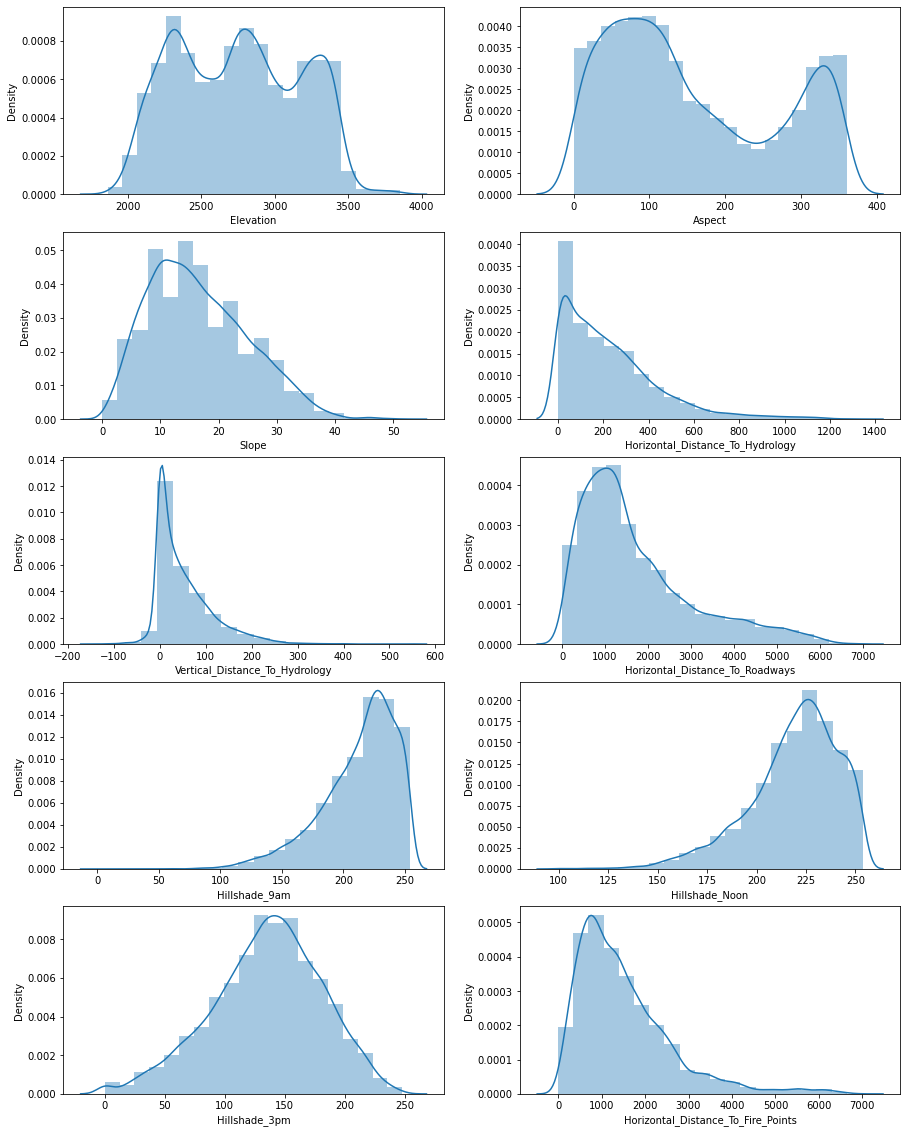

In [10]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

sns.distplot(data.Elevation, bins=20, ax=ax[0,0])
sns.distplot(data.Aspect, bins=20, ax=ax[0,1])
sns.distplot(data.Slope, bins = 20, ax=ax[1,0]) 
sns.distplot(data.Horizontal_Distance_To_Hydrology, bins = 20, ax=ax[1,1])
sns.distplot(data.Vertical_Distance_To_Hydrology, bins = 20, ax=ax[2,0]) 
sns.distplot(data.Horizontal_Distance_To_Roadways, bins = 20, ax=ax[2,1]) 
sns.distplot(data.Hillshade_9am, bins = 20, ax=ax[3,0]) 
sns.distplot(data.Hillshade_Noon, bins = 20, ax=ax[3,1])
sns.distplot(data.Hillshade_3pm, bins = 20, ax=ax[4,0])
sns.distplot(data.Horizontal_Distance_To_Fire_Points, bins = 20, ax=ax[4,1])
plt.show()


#### Univariate Analysis Insights:
1.Elevation has distinct distributions for most forest cover types, important feature.
2.Aspect - The cottonwood/willow and Aspen trees are bunched together more prominently below 180 degree azimuth and the Douglas fir grows at some crazy high azimuth values. Most of examples of the cover types follow a similar distribution.
3.The aspen, panderosa pine, cottonwood/willow and douglas fir grow over a wider range of sloped terrain. The rest tend to grow in less steep terrain.
4.The cotton willow mostly grows close to water features, to a higher extent than the other trees coverage types.
5.There are coverage types that generally grow closer to the roadways.
6.The hillshade features are highly correalted with the aspect and slope features, makes sense.

#### Bivariate Analysis

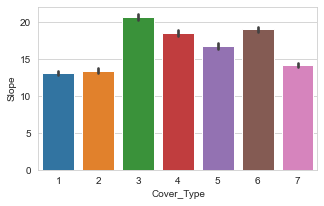

In [11]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.barplot(data=data,x='Cover_Type',y='Slope')
plt.show()

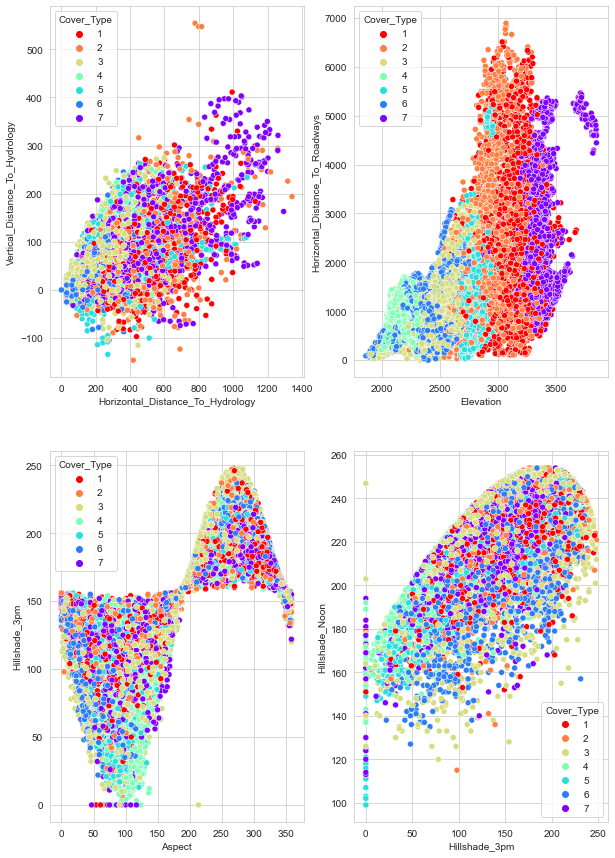

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10,15))

sns.scatterplot(data=data, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=data, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=data, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=data, x="Hillshade_3pm", y="Hillshade_Noon", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()

plt.figure(figsize=(10,10))
g = sns.PairGrid(data=data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<AxesSubplot:xlabel='Cover_Type', ylabel='Wilderness_Area4'>

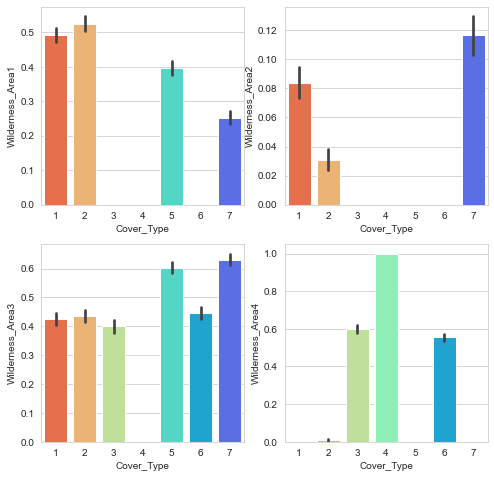

In [13]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data,x="Cover_Type", y="Wilderness_Area1", palette='rainbow_r', ax=ax[0,0])
sns.barplot(data=data, x="Cover_Type",y="Wilderness_Area2", palette='rainbow_r', ax=ax[0,1])
sns.barplot(data=data, x="Cover_Type", y="Wilderness_Area3", palette='rainbow_r', ax=ax[1,0])
sns.barplot(data=data,x="Cover_Type", y="Wilderness_Area4", palette='rainbow_r', ax=ax[1,1])

<AxesSubplot:xlabel='Cover_Type', ylabel='Soil_Type40'>

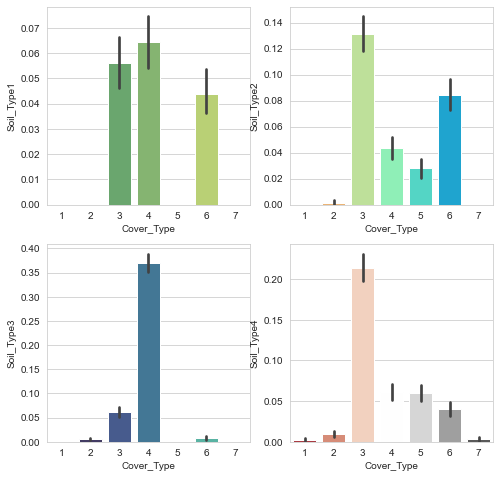

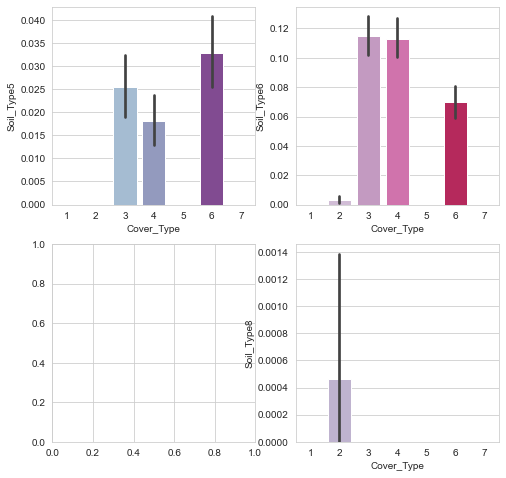

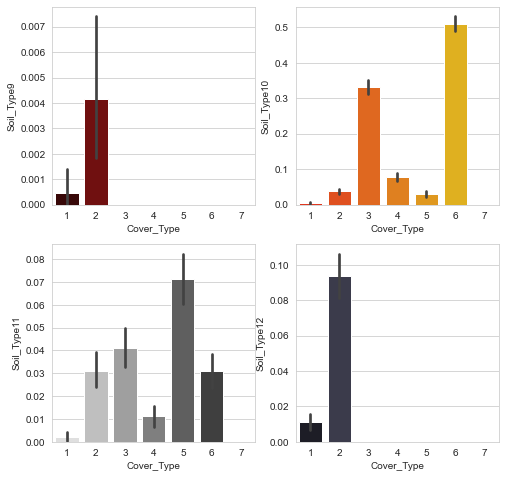

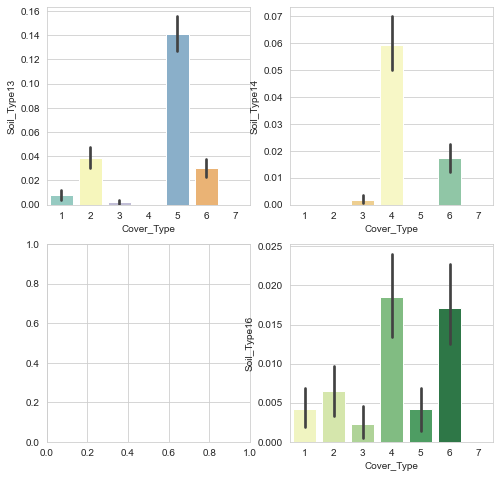

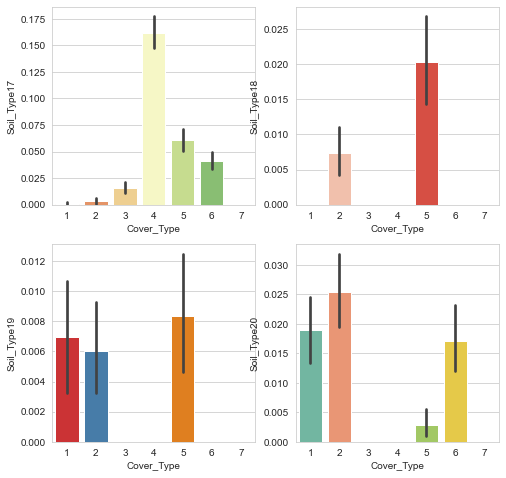

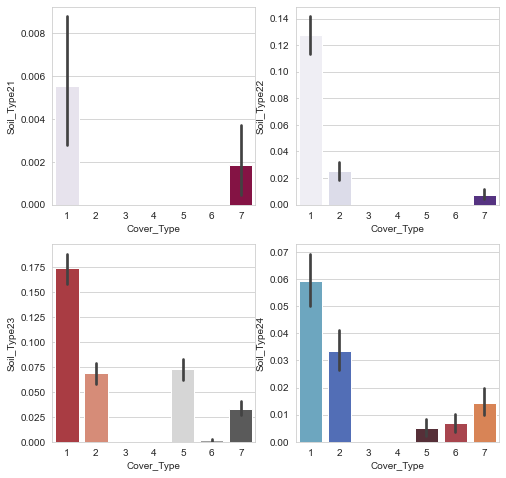

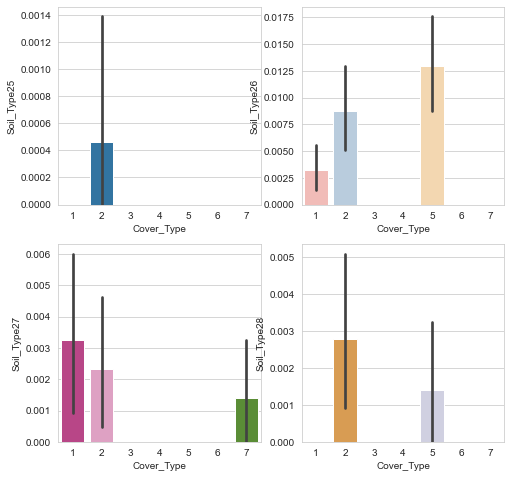

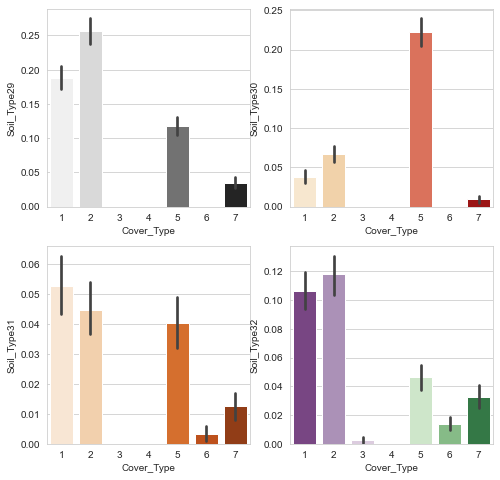

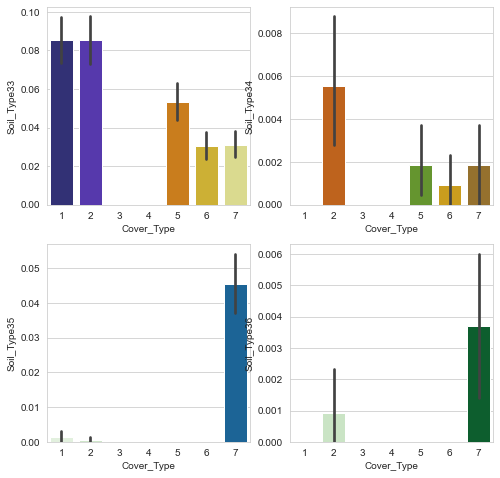

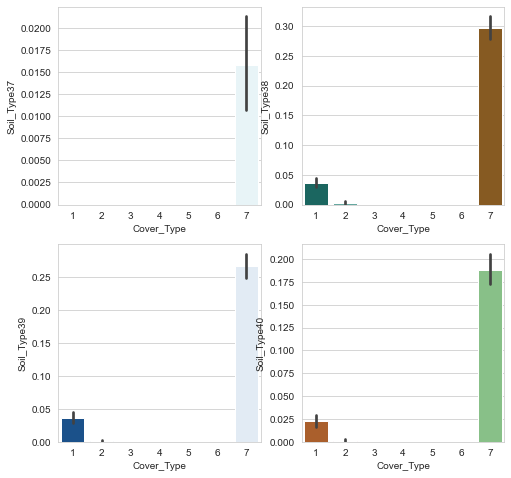

In [14]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type1", x="Cover_Type", palette='summer', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type2", x="Cover_Type", palette='rainbow_r', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type3", x="Cover_Type", palette='mako', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type4", x="Cover_Type", palette='RdGy', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type5", x="Cover_Type", palette='BuPu', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type6", x="Cover_Type", palette='PuRd', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type8", x="Cover_Type", palette='Accent', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type9", x="Cover_Type", palette='afmhot', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type10", x="Cover_Type", palette='autumn', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type11", x="Cover_Type", palette='binary', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type12", x="Cover_Type", palette='bone', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type13", x="Cover_Type", palette='Set3', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type14", x="Cover_Type", palette='Spectral', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type16", x="Cover_Type", palette='YlGn', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type17", x="Cover_Type", palette='RdYlGn', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type18", x="Cover_Type", palette='Reds', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type19", x="Cover_Type", palette='Set1', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type20", x="Cover_Type", palette='Set2', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type21", x="Cover_Type", palette='PuRd', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type22", x="Cover_Type", palette='Purples', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type23", x="Cover_Type", palette='RdGy', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type24", x="Cover_Type", palette='icefire', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type25", x="Cover_Type", palette='Paired', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type26", x="Cover_Type", palette='Pastel1', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type27", x="Cover_Type", palette='PiYG', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type28", x="Cover_Type", palette='PuOr', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type29", x="Cover_Type", palette='Greys', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type30", x="Cover_Type", palette='OrRd', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type31", x="Cover_Type", palette='Oranges', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type32", x="Cover_Type", palette='PRGn', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type33", x="Cover_Type", palette='CMRmap', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type34", x="Cover_Type", palette='Dark2', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type35", x="Cover_Type", palette='GnBu', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type36", x="Cover_Type", palette='Greens', ax=ax[1,1])
fig, ax = plt.subplots(2,2, figsize=(8,8))
sns.barplot(data=data, y="Soil_Type37", x="Cover_Type", palette='BuGn_r', ax=ax[0,0])
sns.barplot(data=data, y="Soil_Type38", x="Cover_Type", palette='BrBG_r', ax=ax[0,1])
sns.barplot(data=data, y="Soil_Type39", x="Cover_Type", palette='Blues_r', ax=ax[1,0])
sns.barplot(data=data, y="Soil_Type40", x="Cover_Type", palette='Accent_r', ax=ax[1,1])



## Data Pre Processing

#### cheking Null values

In [15]:
data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


#### Handling outliers

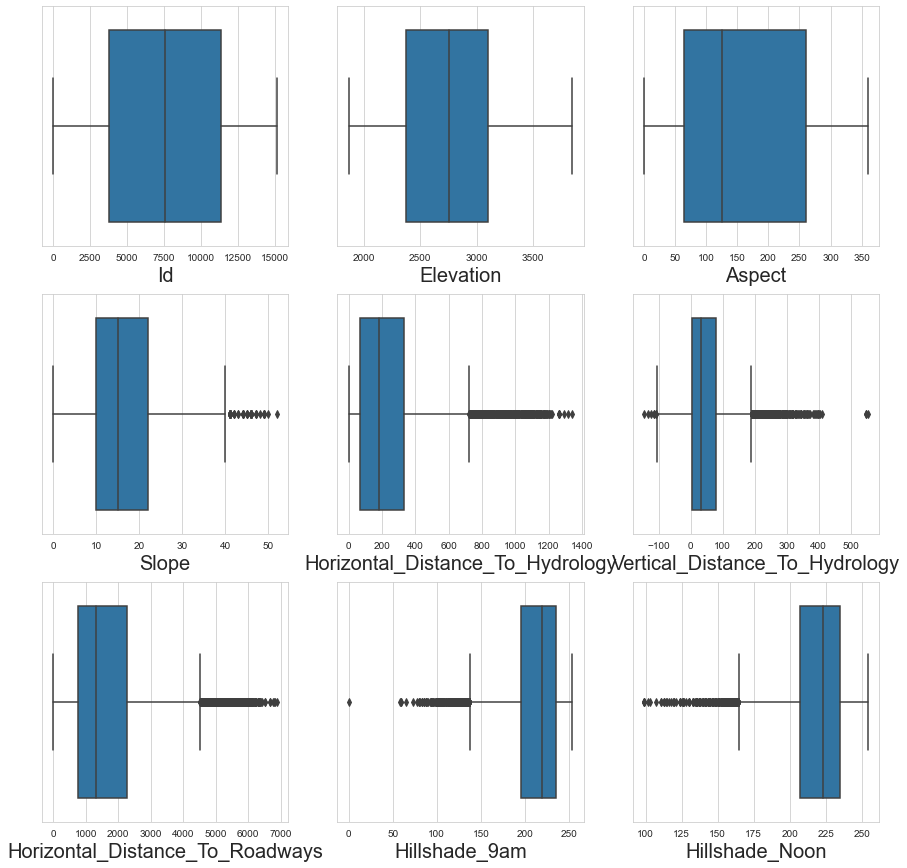

In [16]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### Slope

In [17]:
upper_limit=data.Slope.mean()+3*data.Slope.std()
upper_limit

41.863367587586694

In [18]:
lower_limit=data.Slope.mean()-3*data.Slope.std()
lower_limit

-8.860192984412091

In [19]:
data.loc[data['Slope']<lower_limit]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [20]:
len(data.loc[data['Slope']<lower_limit])

0

In [21]:
#calculate percentage
data.shape[0]
len(data.loc[data['Slope'] > upper_limit])

39

In [22]:
data.loc[data['Slope'] > upper_limit,'Slope']=data['Slope'].median()

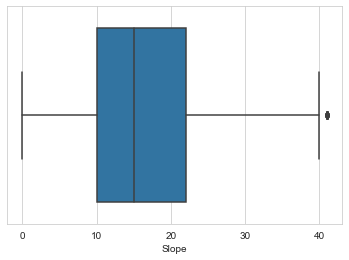

In [23]:
sns.boxplot(x='Slope',data=data)
plt.show()

#### Horizontal_Distance_To_Hydrology

In [24]:
upper_limit=data.Horizontal_Distance_To_Hydrology.mean()+3*data.Horizontal_Distance_To_Hydrology.std()
upper_limit

857.4215881653764

In [25]:
lower_limit=data.Horizontal_Distance_To_Hydrology.mean()-3*data.Horizontal_Distance_To_Hydrology.std()
lower_limit

-403.0301860489743

In [26]:
data.loc[data['Horizontal_Distance_To_Hydrology']<lower_limit]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [27]:
len(data.loc[data['Horizontal_Distance_To_Hydrology']<lower_limit])

0

In [28]:
#calculate percentage
data.shape[0]
len(data.loc[data['Horizontal_Distance_To_Hydrology'] > upper_limit])

285

In [29]:
data.loc[data['Horizontal_Distance_To_Hydrology'] > upper_limit,'Horizontal_Distance_To_Hydrology']=data['Horizontal_Distance_To_Hydrology'].median()

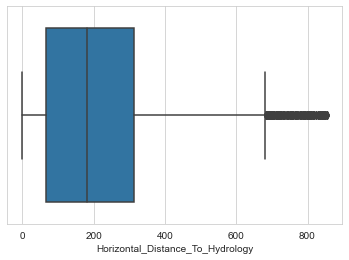

In [30]:
sns.boxplot(x='Horizontal_Distance_To_Hydrology',data=data)
plt.show()

#### Vertical_Distance_To_Hydrology

In [31]:
upper_limit=data.Vertical_Distance_To_Hydrology.mean()+3*data.Vertical_Distance_To_Hydrology.std()
upper_limit

234.79473955235702

In [32]:
lower_limit=data.Vertical_Distance_To_Hydrology.mean()-3*data.Vertical_Distance_To_Hydrology.std()
lower_limit

-132.6416972243147

In [33]:
data.loc[data['Vertical_Distance_To_Hydrology']<lower_limit]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1528,1529,2795,80,31,270,-134,306,243,168,31,...,0,0,0,0,0,0,0,0,0,5
10626,10627,3175,124,19,418,-146,319,248,222,94,...,0,0,0,0,0,0,0,0,0,2


In [34]:
#calculate percentage
data.shape[0]
len(data.loc[data['Vertical_Distance_To_Hydrology'] > upper_limit])

211

In [35]:
data.loc[data['Vertical_Distance_To_Hydrology'] > upper_limit,'Vertical_Distance_To_Hydrology']=data['Vertical_Distance_To_Hydrology'].median()

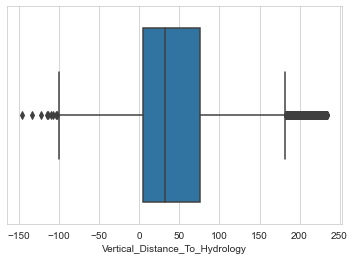

In [36]:
sns.boxplot(x='Vertical_Distance_To_Hydrology',data=data)
plt.show()

#### Horizontal_Distance_To_Roadways

In [37]:
upper_limit=data.Horizontal_Distance_To_Roadways.mean()+3*data.Horizontal_Distance_To_Roadways.std()
upper_limit

5689.222288793467

In [38]:
lower_limit=data.Horizontal_Distance_To_Roadways.mean()-3*data.Horizontal_Distance_To_Roadways.std()
lower_limit

-2261.175860222039

In [39]:
data.loc[data['Horizontal_Distance_To_Roadways']<lower_limit]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [40]:
#calculate percentage
data.shape[0]
len(data.loc[data['Horizontal_Distance_To_Roadways'] > upper_limit])

155

In [41]:
data.loc[data['Horizontal_Distance_To_Roadways'] > upper_limit,'Horizontal_Distance_To_Roadways']=data['Horizontal_Distance_To_Roadways'].median()

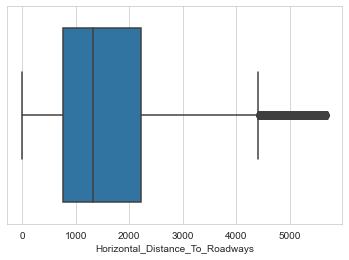

In [42]:
sns.boxplot(x='Horizontal_Distance_To_Roadways',data=data)
plt.show()

#### Hillshade_9am

In [43]:
upper_limit=data.Hillshade_9am.mean()+3*data.Hillshade_9am.std()
upper_limit

304.3881596003307

In [44]:
lower_limit=data.Hillshade_9am.mean()-3*data.Hillshade_9am.std()
lower_limit

121.0204382832672

In [45]:
data.loc[data['Hillshade_9am']<lower_limit]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
124,125,2847,320,33,85,39,4983,120,190,199,...,0,0,0,0,0,0,0,0,0,2
167,168,2860,276,33,60,33,5292,115,226,240,...,0,0,0,0,0,0,0,0,0,2
1950,1951,2027,272,37,60,26,150,100,222,246,...,0,0,0,0,0,0,0,0,0,3
1954,1955,2847,291,36,743,32,934,101,209,236,...,0,0,0,0,0,0,0,0,0,2
1980,1981,2175,303,31,270,173,391,120,208,220,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14537,14538,3200,349,15,108,42,2985,111,136,139,...,1,0,0,0,0,0,0,0,0,2
14739,14740,3333,322,35,426,137,537,113,182,197,...,0,1,0,0,0,0,0,0,0,1
14748,14749,3373,291,31,524,169,638,119,218,230,...,0,1,0,0,0,0,0,0,0,1
14779,14780,3397,332,38,277,144,990,107,164,180,...,0,0,0,0,0,0,0,1,0,7


In [46]:
#calculate percentage
data.shape[0]
len(data.loc[data['Hillshade_9am'] > upper_limit])

0

In [47]:
data.loc[data['Hillshade_9am'] > upper_limit,'Hillshade_9am']=data['Hillshade_9am'].median()

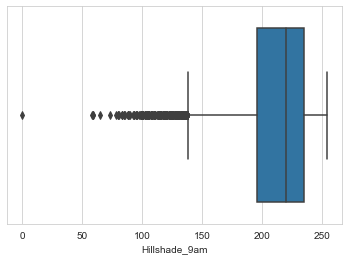

In [48]:
sns.boxplot(x='Hillshade_9am',data=data)
plt.show()

In [49]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [50]:
data1=data[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4','Cover_Type']]

### Feature selection

#### checking correlation

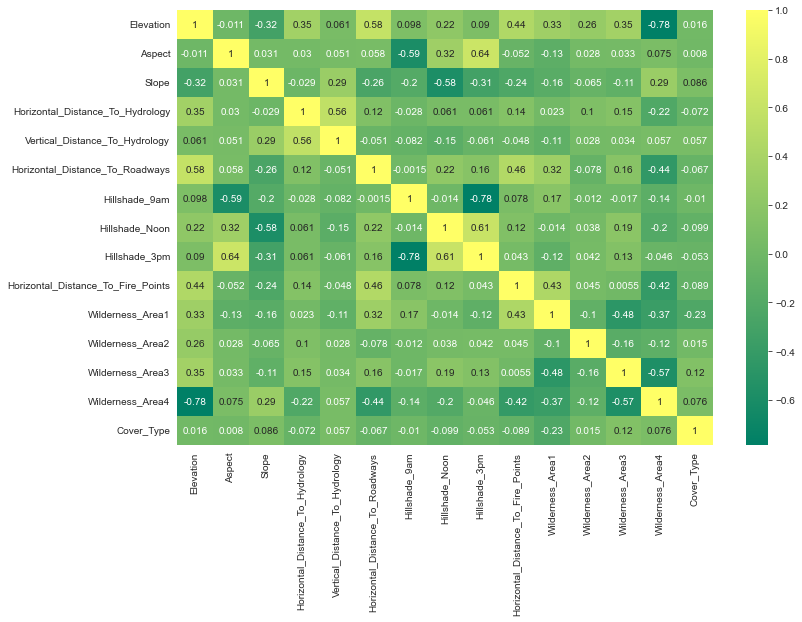

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(),annot=True,cmap='summer')
plt.show()

#### checking constants

In [52]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.421693,211.588228,47.586971,1666.159854,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.319546,179.511790,54.397198,1251.996708,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,313.000000,76.000000,2220.250000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,41.000000,854.000000,234.000000,5689.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Model Building

In [53]:
#creating independent and dependent variable
X=data.iloc[:,1:-1]
y=data.Cover_Type

In [54]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

In [57]:
X_test.shape

(3024, 54)

In [58]:
y_test.shape

(3024,)

### Random Forest Model

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)
y_hat

array([6, 6, 1, ..., 5, 4, 4], dtype=int64)

In [60]:
y_train_predict=dt.predict(X_train)
y_train_predict

array([3, 5, 2, ..., 2, 5, 7], dtype=int64)

In [61]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


1.0

In [62]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1739
           2       1.00      1.00      1.00      1722
           3       1.00      1.00      1.00      1732
           4       1.00      1.00      1.00      1711
           5       1.00      1.00      1.00      1744
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096



In [63]:
pd.crosstab(y_train,y_train_predict)

col_0,1,2,3,4,5,6,7
Cover_Type,,,,,,,
1,1739,0,0,0,0,0,0
2,0,1722,0,0,0,0,0
3,0,0,1732,0,0,0,0
4,0,0,0,1711,0,0,0
5,0,0,0,0,1744,0,0
6,0,0,0,0,0,1728,0
7,0,0,0,0,0,0,1720


In [64]:
## test acc
test_acc_rf=(accuracy_score(y_test,y_hat)*100) #testing accuracy 
test_acc_rf

78.86904761904762

In [65]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.65      0.66      0.66       421
           2       0.62      0.58      0.60       438
           3       0.77      0.75      0.76       428
           4       0.92      0.95      0.93       449
           5       0.85      0.90      0.87       416
           6       0.77      0.75      0.76       432
           7       0.92      0.92      0.92       440

    accuracy                           0.79      3024
   macro avg       0.79      0.79      0.79      3024
weighted avg       0.79      0.79      0.79      3024



In [66]:
pd.crosstab(y_test,y_hat)

col_0,1,2,3,4,5,6,7
Cover_Type,,,,,,,
1,279,105,0,0,8,1,28
2,112,256,9,0,47,9,5
3,0,9,319,22,4,74,0
4,0,0,15,426,0,8,0
5,5,25,7,0,373,6,0
6,2,18,65,16,5,326,0
7,30,3,1,0,0,0,406


### KNN Model

In [67]:
#scalling the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [68]:
X_scaled

array([[-0.36709512, -0.95997982, -1.61332563, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.38146072, -0.9145592 , -1.73352847, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [ 0.1309124 , -0.16057691, -0.89210859, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       ...,
       [-0.61609888, -0.20599753,  1.03113685, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.62807021,  0.09377856,  1.39174537, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.65680142,  0.36630228,  2.1129624 , ..., -0.22490811,
        -0.21313437, -0.1769394 ]])

In [69]:
#spliting testing and training data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

In [70]:
## taking optimal k to determine how many nearest neighbors  to create
from sklearn.neighbors import KNeighborsClassifier

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

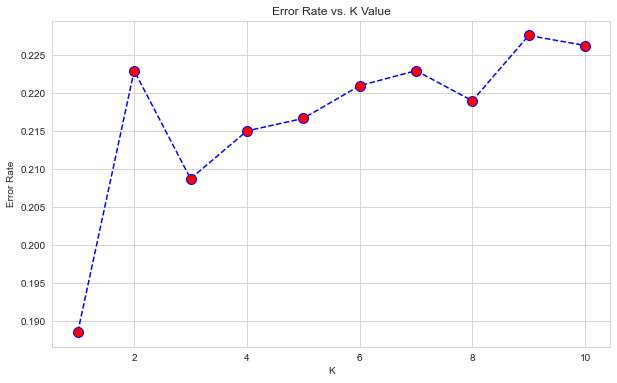

In [71]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)# Predict 
y_pred = knn.predict(X_test)

In [73]:
# Checking Accuracy score
print('Knn_acc', accuracy_score(y_test,y_pred)*100)

Knn_acc 77.71164021164022


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.68      0.63      0.66       421
           2       0.69      0.58      0.63       438
           3       0.75      0.68      0.71       428
           4       0.85      0.95      0.90       449
           5       0.77      0.91      0.84       416
           6       0.73      0.74      0.74       432
           7       0.92      0.94      0.93       440

    accuracy                           0.78      3024
   macro avg       0.77      0.78      0.77      3024
weighted avg       0.77      0.78      0.77      3024



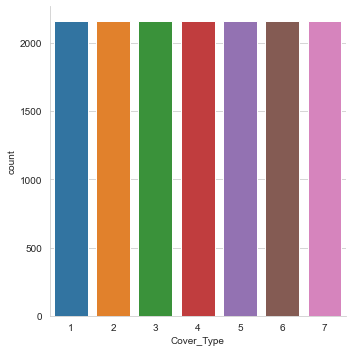

In [75]:
## checking the balance of target
sns.catplot(x='Cover_Type',data=data,kind='count')

### K-Means cluster Model

In [76]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans


# Initialise the model with K as 3
model = KMeans(n_clusters=3, random_state=10)

#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=10)

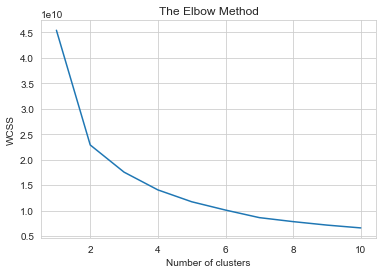

In [77]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.3807741277597641

### Decision Tree Classifier Model

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

In [80]:
from sklearn.tree import DecisionTreeClassifier #importing the Algorothm
DTC=DecisionTreeClassifier() #create object to the Algorithm
DTC.fit(X_train,y_train) #traing the Algorithm


DecisionTreeClassifier()

In [81]:
y_tree_pred=DTC.predict(X_test) #prediction
y_tree_pred

array([6, 6, 1, ..., 5, 4, 4], dtype=int64)

In [82]:
from sklearn.metrics import classification_report,accuracy_score

In [83]:
# Accuracy score for testing
print('acc_decision_tree',accuracy_score(y_test,y_tree_pred)*100)

acc_decision_tree 78.24074074074075


In [84]:
print(classification_report(y_test,y_tree_pred))

              precision    recall  f1-score   support

           1       0.64      0.65      0.64       421
           2       0.61      0.57      0.59       438
           3       0.76      0.75      0.75       428
           4       0.93      0.95      0.94       449
           5       0.84      0.88      0.86       416
           6       0.76      0.76      0.76       432
           7       0.91      0.91      0.91       440

    accuracy                           0.78      3024
   macro avg       0.78      0.78      0.78      3024
weighted avg       0.78      0.78      0.78      3024



### Linear Regression Model

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression #importing the Algorithm
LR=LinearRegression() #create object to the Algorithm
LR.fit(X_train,y_train)# Train the algorithm


LinearRegression()

In [87]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_error

In [88]:
y_lr_pred=LR.predict(X_test)

In [89]:
r2score=r2_score(y_test,y_lr_pred)
r2score

0.43242074335845093

In [90]:
X_test.shape

(3024, 54)

In [91]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.43)*(3024-52)/(3024-52-1)
print("Adjusted r2 ",adjusted_r2*100,"%")

Adjusted r2  42.98081454055873 %


In [92]:
import math
print(mean_squared_error(y_test,y_lr_pred))
print(math.sqrt(mean_squared_error(y_test,y_lr_pred))) # root mean squared error

2.265932529541029
1.5053014746359046


In [93]:
print(mean_absolute_error(y_test,y_lr_pred))

1.1699675146524438


### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
LE=LogisticRegression()
LE.fit(X_train,y_train)

LogisticRegression()

In [95]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [96]:
y_pred_LE=LE.predict(X_test)

In [97]:
print('acc_for_LE',accuracy_score(y_test,y_pred_LE)*100)

acc_for_LE 70.99867724867724


In [98]:
print(confusion_matrix(y_test,y_pred_LE))

[[291  70   0   0  22   0  38]
 [101 234  10   0  76  12   5]
 [  0   1 225  62  18 122   0]
 [  0   0  33 398   0  18   0]
 [  8  55  11   0 326  16   0]
 [  0   4  80  54  20 274   0]
 [ 40   0   0   0   1   0 399]]


In [99]:
print(classification_report(y_test,y_pred_LE))

              precision    recall  f1-score   support

           1       0.66      0.69      0.68       421
           2       0.64      0.53      0.58       438
           3       0.63      0.53      0.57       428
           4       0.77      0.89      0.83       449
           5       0.70      0.78      0.74       416
           6       0.62      0.63      0.63       432
           7       0.90      0.91      0.90       440

    accuracy                           0.71      3024
   macro avg       0.70      0.71      0.70      3024
weighted avg       0.71      0.71      0.71      3024



### SVM Model

In [100]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [101]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [102]:
y_pred_svm=svm.predict(X_test)

In [103]:
print('acc_for_svm',accuracy_score(y_test,y_pred_svm)*100)

acc_for_svm 74.0079365079365


In [104]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       0.64      0.67      0.65       421
           2       0.67      0.59      0.63       438
           3       0.70      0.61      0.66       428
           4       0.79      0.96      0.87       449
           5       0.77      0.82      0.80       416
           6       0.68      0.64      0.66       432
           7       0.91      0.87      0.89       440

    accuracy                           0.74      3024
   macro avg       0.74      0.74      0.74      3024
weighted avg       0.74      0.74      0.74      3024



In [105]:
print(confusion_matrix(y_test,y_pred_svm))

[[283  79   0   0  24   2  33]
 [ 96 259  13   1  55   8   6]
 [  0   0 263  61  11  93   0]
 [  0   0   5 432   0  12   0]
 [  9  33  18   0 340  16   0]
 [  4  13  74  55   9 277   0]
 [ 52   2   2   0   0   0 384]]


### XGBooster Model

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [107]:
y_gb_pred=GBC.predict(X_test)

In [108]:
print('acc_for_GBC',accuracy_score(y_test,y_gb_pred)*100)

acc_for_GBC 80.19179894179894


### Conclusion

#### To predict forest cover type different techniques are applied Regression,Classification, Clustering and XGbooster and their accuracy and performance has been compared. it is obtained that XGBooster and Random Forest gives better prediction with 80.2% and 78.7% accuracy.